# Importing libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('titanic.csv')

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


There are **891 rows** and **12 columns** and **"Survived"** would be our target column.<br>
survival	- Survival	0 = No, 1 = Yes<br>
Pclass - is the passenger class.<br>
Name.<br>
Sex.<br>
Age.<br>
SibSp- number of siblings / spouses aboard the Titanic.<br>
Parch- number of parents / children aboard the Titanic.<br>
Ticket<br>
Fare<br>
Cabin<br>
Embarked- Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton<br>

PassengerId is just an id for the entry in the dataset.

In [5]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

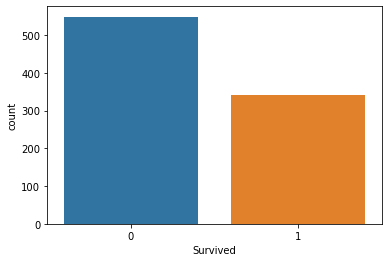

In [6]:
sns.countplot(df['Survived'])

This is **not a Imbalance data problem**. The data set is balanced in terms of our target feature.

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**There are Null values in "Age", "Cabin" and 'Embarked'features.**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Name, Sex, cabin, Embarked are Object datatype and Age, Fare are Float Type. All the other features are Int.

In [9]:
#statistical summary
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Fare column has huge difference in maximum and 75th percentile. Fare column would be highly skewed.

## Lets look at all the columns/features. (Univariate)

In [10]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [11]:
df.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [12]:
pd.crosstab(df['Sex'], df['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


<AxesSubplot:xlabel='Survived', ylabel='count'>

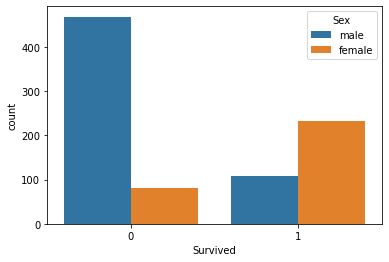

In [13]:
sns.countplot(df['Survived'], hue=df['Sex'])

This shows that the female survival rate is very high than males.

In [14]:
df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [15]:
df.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [16]:
pd.crosstab(df['Pclass'], df['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


<AxesSubplot:xlabel='Pclass', ylabel='count'>

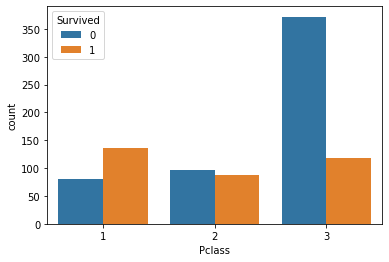

In [17]:
sns.countplot(df['Pclass'], hue=df['Survived'])

Passengers from class 1 has more survival rate, then class 2 and least would be class 3

In [18]:
df.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [19]:
df.groupby("SibSp")["Survived"].mean()

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

In [20]:
pd.crosstab(df['SibSp'], df['Survived'])

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


<AxesSubplot:xlabel='SibSp', ylabel='count'>

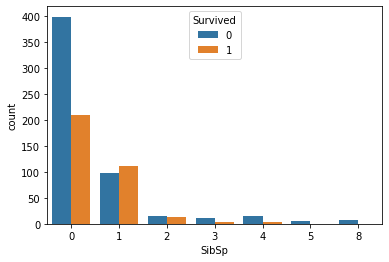

In [21]:
sns.countplot(df['SibSp'], hue=df['Survived'])

Passengers with no Siblings or Spouse has more chance of survival comparatively

In [22]:
df.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [23]:
df.groupby("Parch")["Survived"].mean()

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

In [24]:
pd.crosstab(df['Parch'], df['Survived'])

Survived,0,1
Parch,,
0,445,233
1,53,65
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0


<AxesSubplot:xlabel='Parch', ylabel='count'>

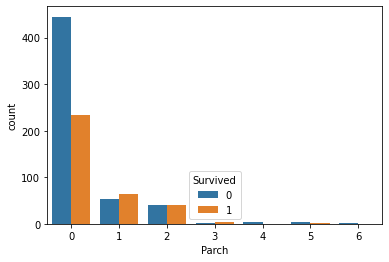

In [25]:
sns.countplot(df['Parch'], hue=df['Survived'])

In both Parch and SibSp people with no realtive on the ship are more in numbers and have more survival rate comparetively.

In [26]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [27]:
pd.crosstab(df["Embarked"],df["Survived"])

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


In [28]:
df.groupby('Embarked')['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Embarked', ylabel='count'>

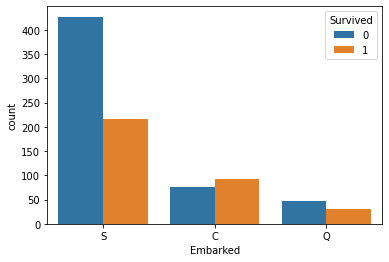

In [29]:
sns.countplot(df['Embarked'], hue=df['Survived'])

Passenger boarded from Cherbourg had survived more comparatively.

<AxesSubplot:xlabel='Age', ylabel='Density'>

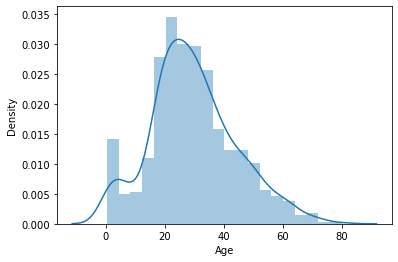

In [30]:
sns.distplot(df['Age'])

Age column is slightly skewed

<AxesSubplot:xlabel='Fare', ylabel='Density'>

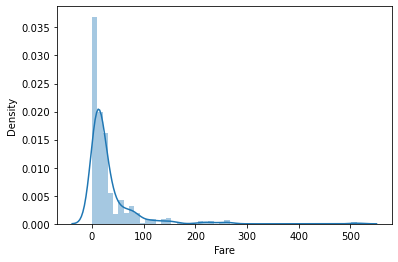

In [31]:
sns.distplot(df['Fare'])

Fare is right skewed

## Treating of columns. (Data preprocessing)

Name column has names of the passenger, however, the names then and now has huge difference. That may help us to notice if the name length reflect the status in society. Let's create a new column and look at the distribution with survived column.

In [32]:
df['Name_length'] = df['Name'].apply(len)

In [33]:
df['Name_length'].value_counts()

19    64
25    55
27    50
18    50
26    49
28    43
24    43
17    42
21    40
23    39
20    39
22    38
30    37
29    32
31    30
16    26
32    23
33    22
15    15
47    11
37    10
38     9
36     9
39     9
45     9
44     8
41     8
34     7
46     7
40     7
51     7
35     6
43     5
42     5
49     5
50     4
52     4
56     3
14     3
48     3
13     2
12     2
53     2
55     2
57     2
67     1
54     1
61     1
65     1
82     1
Name: Name_length, dtype: int64

In [34]:
df.groupby('Name_length')['Survived'].mean()

Name_length
12    0.500000
13    0.500000
14    0.333333
15    0.133333
16    0.230769
17    0.214286
18    0.200000
19    0.234375
20    0.282051
21    0.325000
22    0.315789
23    0.282051
24    0.372093
25    0.327273
26    0.224490
27    0.360000
28    0.372093
29    0.500000
30    0.432432
31    0.400000
32    0.565217
33    0.545455
34    0.428571
35    1.000000
36    0.333333
37    0.700000
38    0.444444
39    0.444444
40    0.428571
41    1.000000
42    0.200000
43    0.800000
44    1.000000
45    0.777778
46    0.571429
47    0.727273
48    1.000000
49    1.000000
50    1.000000
51    1.000000
52    0.750000
53    1.000000
54    0.000000
55    0.500000
56    0.666667
57    0.500000
61    1.000000
65    1.000000
67    1.000000
82    1.000000
Name: Survived, dtype: float64

Name_length may help us in our model creation, we will drop Name and keep Name_length.

Let's look at cabin column. Let's fill the missing values in cabin column and look at the feature.

In [35]:
df.Cabin=df.Cabin.fillna("Missing")
df.Cabin

0      Missing
1          C85
2      Missing
3         C123
4      Missing
        ...   
886    Missing
887        B42
888    Missing
889       C148
890    Missing
Name: Cabin, Length: 891, dtype: object

Done, we will try to extract the First element of the cabin elements. This might give us more good understanding of the feature.

In [36]:
# create a function for finding the first letter of the cabin
def firstword (string):
    prima=string[0]
    return prima

In [37]:
df["cabin_1"]=df["Cabin"].apply(firstword)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_length,cabin_1
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Missing,S,23,M
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,51,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Missing,S,22,M
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,44,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Missing,S,24,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,Missing,S,21,M
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,28,B
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,Missing,S,40,M
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,21,C


In [38]:
df['cabin_1'].value_counts()

M    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_1, dtype: int64

There are lots of passenger with no or missing cabins.

<AxesSubplot:xlabel='cabin_1', ylabel='count'>

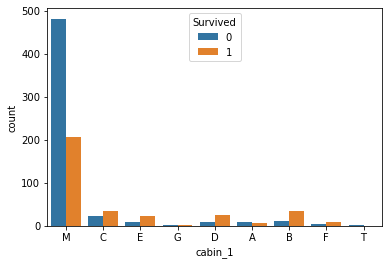

In [39]:
sns.countplot(df['cabin_1'], hue=df['Survived'])

In [40]:
df.groupby('cabin_1')['Survived'].mean()

cabin_1
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
M    0.299854
T    0.000000
Name: Survived, dtype: float64

This shows that cabin with 'M' or no cabin have less survival chances and passengers with cabins have a good chance of survival.

Let's divide the cabin_1 into two categories. With no cabin('M') and with cabin.

In [41]:
def cabdiv (string):
    if string=="M":
        return 0
    else:
        return 1

In [42]:
df['cabin_final'] = df.cabin_1.apply(cabdiv)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_length,cabin_1,cabin_final
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Missing,S,23,M,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,51,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Missing,S,22,M,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,44,C,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Missing,S,24,M,0


<AxesSubplot:xlabel='cabin_final', ylabel='count'>

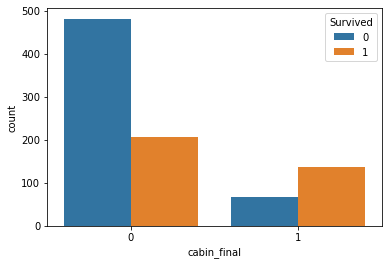

In [43]:
sns.countplot(df['cabin_final'], hue=df['Survived'])

In [44]:
df.groupby('cabin_final')['Survived'].mean()

cabin_final
0    0.299854
1    0.666667
Name: Survived, dtype: float64

In [45]:
pd.crosstab(df['cabin_final'],df['Survived'])

Survived,0,1
cabin_final,,
0,481,206
1,68,136


This shows the influence of cabin_final feature. Lets drop all Cabin and Cabin_1 feature.

In [46]:
df = df.drop(['Cabin','cabin_1'], axis=1)

In [47]:
df = df.drop('Name', axis=1)

In [48]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Name_length,cabin_final
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,23,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,51,1
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,22,0
3,4,1,1,female,35.0,1,0,113803,53.1000,S,44,1
4,5,0,3,male,35.0,0,0,373450,8.0500,S,24,0


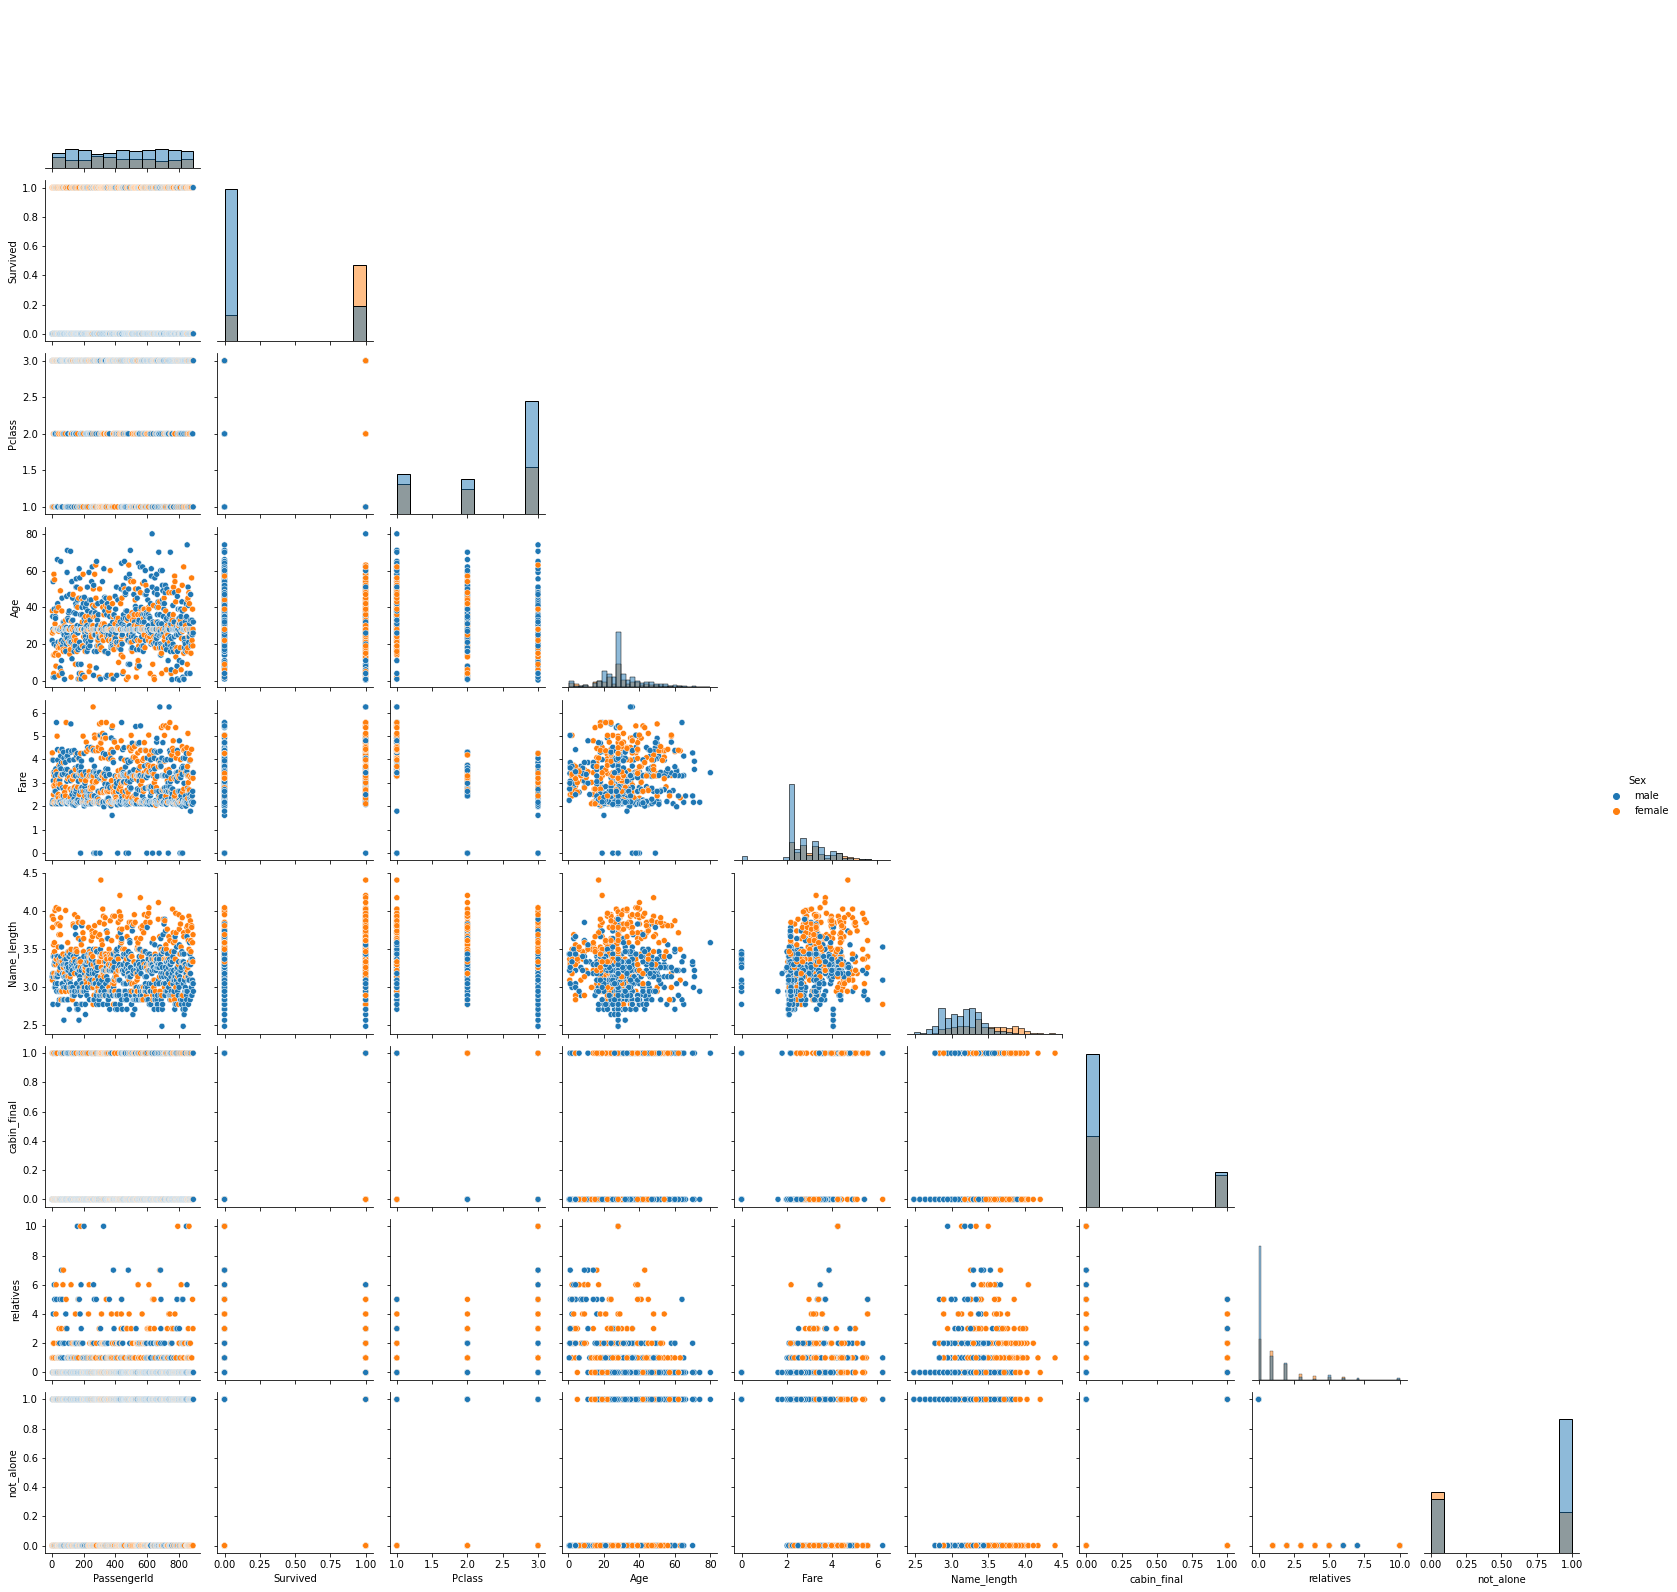

In [75]:
sns.pairplot(df, hue="Sex", diag_kind="hist", corner=True)

Pair plot is not much of help in this problem statement.

<AxesSubplot:>

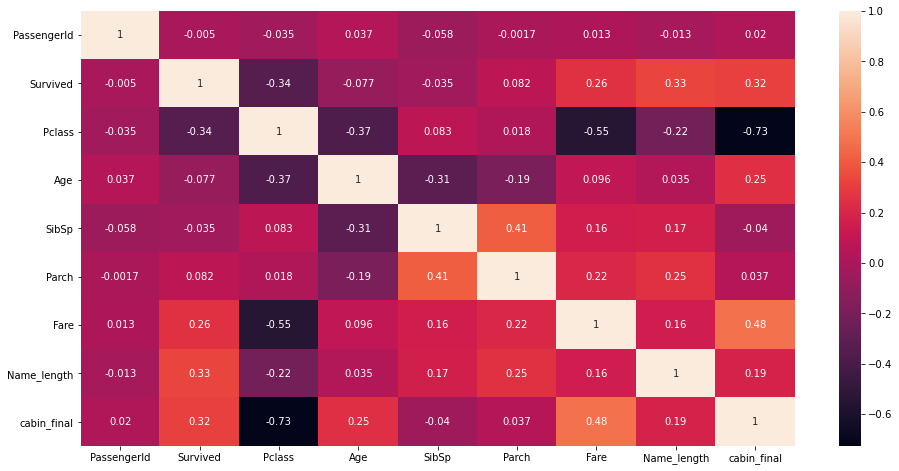

In [50]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), annot=True)

As the correlation with Parch and SibSp is very low. Let us create a column with no relatives and with yes relatives. This will help us drop these two columns.

In [51]:
df['relatives'] = df['SibSp'] + df['Parch']
df.loc[df['relatives'] > 0, 'not_alone'] = 0
df.loc[df['relatives'] == 0, 'not_alone'] = 1
df['not_alone'] = df['not_alone'].astype(int)

In [52]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Name_length,cabin_final,relatives,not_alone
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,23,0,1,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,51,1,1,0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,22,0,0,1
3,4,1,1,female,35.0,1,0,113803,53.1000,S,44,1,1,0
4,5,0,3,male,35.0,0,0,373450,8.0500,S,24,0,0,1


Let's drop "SibSp", "Parch" along with "Ticket" column. 

In [53]:
df = df.drop(['SibSp', 'Parch','Ticket'], axis=1)

## Treating Missing values.

In [54]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
Fare             0
Embarked         2
Name_length      0
cabin_final      0
relatives        0
not_alone        0
dtype: int64

In [55]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Let's fill null values with "S" as this is the most frequent variable.

In [56]:
df['Embarked'] = df['Embarked'].fillna('S')

Let's replace the missing values with median values.

In [59]:
df['Age'] = df['Age'].fillna(df['Age'].median())

Dropping 177 rows(age null rows) would be around 18-20 % of data lose. Not preferrable.

In [60]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
Name_length    0
cabin_final    0
relatives      0
not_alone      0
dtype: int64

Missing values have been treated. Let's look at the skewness of the data.

## Treating Skewness

In [61]:
df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.510245
Fare           4.787317
Name_length    1.392643
cabin_final    1.292367
relatives      2.727441
not_alone     -0.420431
dtype: float64

"cabin_final", 'not_alone', 'relatives' are categorical features. Fare is highly skewed. Name_length as well.

In [63]:
from scipy import stats
import pylab

def original_dist(data_frame,feature_name):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    stats.probplot(data_frame[feature_name], dist="norm", plot=pylab)
    plt.subplot(1,2,2)
    data_frame[feature_name].hist()
    plt.title("Original_dist")
    plt.show()

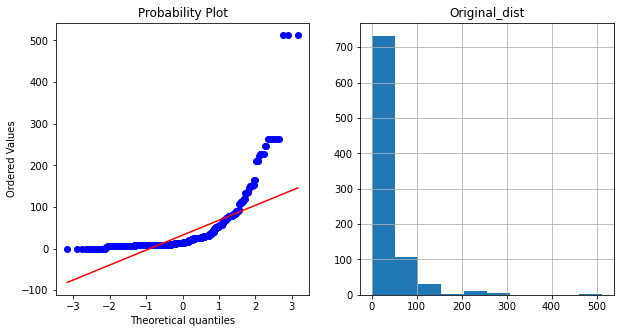

In [64]:
original_dist(df,'Fare')

In [65]:
(np.log1p(df['Fare'])).skew()

0.3949280095189306

In [66]:
df['Fare'] = np.log1p(df['Fare'])

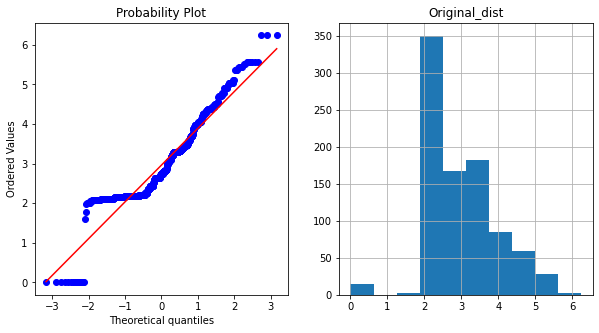

In [67]:
original_dist(df,'Fare')

Skewness corrected with Fare

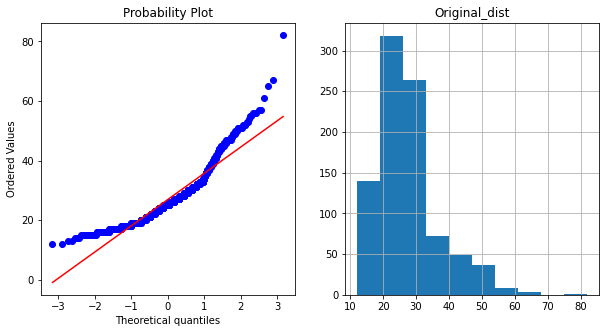

In [69]:
original_dist(df, 'Name_length')

In [71]:
(np.log(df['Name_length'])).skew()

0.4910565064468124

In [72]:
df['Name_length'] = np.log(df['Name_length'])

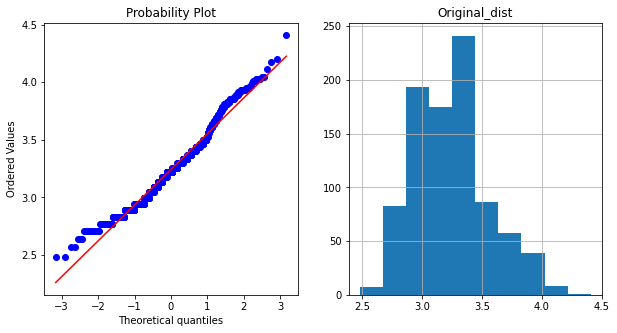

In [73]:
original_dist(df, 'Name_length')

Let us now encode the "Sex" and "Embarked" columns.

In [76]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [77]:
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

In [78]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Name_length,cabin_final,relatives,not_alone
0,1,0,3,1,22.0,2.110213,2,3.135494,0,1,0
1,2,1,1,0,38.0,4.280593,0,3.931826,1,1,0
2,3,1,3,0,26.0,2.188856,2,3.091042,0,0,1
3,4,1,1,0,35.0,3.990834,2,3.784190,1,1,0
4,5,0,3,1,35.0,2.202765,2,3.178054,0,0,1


All done. Let's proceed toward model building.

In [79]:
x = df.drop('Survived',axis=1)
y = df['Survived']

# **Model Building**

## Finding the best random state for the model

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [82]:
maxAccu = 0
maxRS = 0

for i in range(0,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=i)
    lr = LogisticRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    accu = accuracy_score(y_test,pred)
    
    if accu > maxAccu:
        maxAccu = accu
        maxRS = i
print("Best accuracy is",maxAccu,"on random state",maxRS)

Best accuracy is 0.8770949720670391 on random state 150


we have found that the at random state **150** we have maximum accuracy.

## Creating train_test_split


In [84]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=150)

Now we will try out every model and look at the Accuracy Score.

In [85]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.8770949720670391
[[102   8]
 [ 14  55]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       110
           1       0.87      0.80      0.83        69

    accuracy                           0.88       179
   macro avg       0.88      0.86      0.87       179
weighted avg       0.88      0.88      0.88       179



In [86]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred = dt.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.7988826815642458
[[91 19]
 [17 52]]
              precision    recall  f1-score   support

           0       0.84      0.83      0.83       110
           1       0.73      0.75      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [87]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.8324022346368715
[[99 11]
 [19 50]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       110
           1       0.82      0.72      0.77        69

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179



In [88]:
ad = AdaBoostClassifier()
ad.fit(x_train,y_train)
pred = ad.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.8603351955307262
[[99 11]
 [14 55]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       110
           1       0.83      0.80      0.81        69

    accuracy                           0.86       179
   macro avg       0.85      0.85      0.85       179
weighted avg       0.86      0.86      0.86       179



In [89]:
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
pred = kn.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.5865921787709497
[[86 24]
 [50 19]]
              precision    recall  f1-score   support

           0       0.63      0.78      0.70       110
           1       0.44      0.28      0.34        69

    accuracy                           0.59       179
   macro avg       0.54      0.53      0.52       179
weighted avg       0.56      0.59      0.56       179



In [90]:
sv = SVC()
sv.fit(x_train,y_train)
pred = sv.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.6145251396648045
[[110   0]
 [ 69   0]]
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       110
           1       0.00      0.00      0.00        69

    accuracy                           0.61       179
   macro avg       0.31      0.50      0.38       179
weighted avg       0.38      0.61      0.47       179



Logistic regression gave us good result. Let's cross validate.

## Crossvalidation.

In [91]:
from sklearn.model_selection import cross_val_score
rfc = cross_val_score(rf, x, y, cv=5)

print("Cross validation score of Random Forest Classifier:", rfc.mean())

Cross validation score of Random Forest Classifier: 0.8182035026049839


In [92]:
dtc = cross_val_score(dt, x, y, cv=5)

print("Cross validation score of Decision Tree Classifier:", dtc.mean())

Cross validation score of Decision Tree Classifier: 0.7397275751679117


In [93]:
knc = cross_val_score(kn, x, y, cv=5)

print("Cross validation score of Kneigbors Classifier:", knc.mean())

Cross validation score of Kneigbors Classifier: 0.5049274998430733


In [94]:
svc1 = cross_val_score(sv, x, y, cv=5)

print("Cross validation score of Support Vector Classifier:", svc1.mean())

Cross validation score of Support Vector Classifier: 0.6161634548992531


In [95]:
lrc = cross_val_score(lr, x, y, cv=5)

print("Cross validation score of Logistic Regression Classifier:", lrc.mean())

Cross validation score of Logistic Regression Classifier: 0.8002322515849603


Random Forest has the least difference and better performance for this problem.

## Hyperparameter Tuning

In [96]:
from sklearn.model_selection import GridSearchCV

In [97]:
#Creating parameter list to pass in GridsearchCV

parameters = {'max_depth': np.arange(2,15),
              'criterion':['gini','entropy']}

In [98]:
GCV = GridSearchCV(RandomForestClassifier(), parameters, cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [99]:
#Printing the best parameters.
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 13}

## Model

In [107]:
model = RandomForestClassifier(criterion= 'entropy', max_depth= 13, random_state = 150)
model.fit(x_train,y_train)
pred = model.predict(x_test)
print(accuracy_score(y_test,pred)*100)

86.59217877094973


## Saving the Model

In [108]:
import joblib
joblib.dump(model,"Titanic_submission.pkl")

['Titanic_submission.pkl']